# Simple linear regression - Q1

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# Import datasets
data=pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# EDA and Data Visualization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

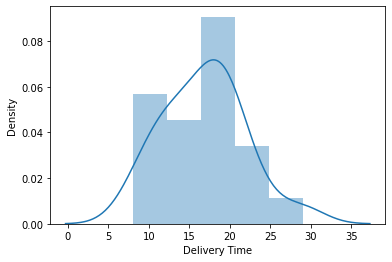

In [4]:
sns.distplot(data['Delivery Time'])

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

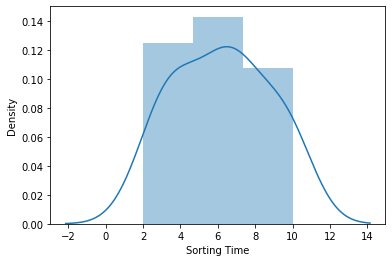

In [5]:
sns.distplot(data['Sorting Time'])

# Feature Engineering

In [6]:
# Renaming columns
data = data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation Analysis

In [7]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [8]:
import statsmodels.formula.api as smf

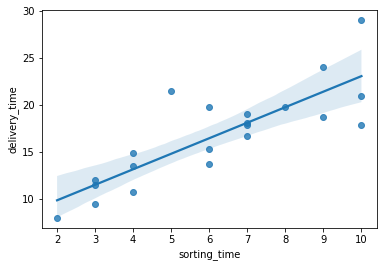

In [10]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'],data=data)
model1=smf.ols("delivery_time~sorting_time",data=data).fit()
model1

# Model Building

In [11]:
newdata1=pd.Series([12,13,14,15,16,17])

In [12]:
data_pred1=pd.DataFrame(newdata1,columns=['sorting_time'])

In [13]:
data_pred1

,sorting_time
0,12
1,13
2,14
3,15
4,16
5,17


# Model Predictions

In [14]:
model1.predict(data_pred1)

0    26.370973
1    28.019993
2    29.669013
3    31.318032
4    32.967052
5    34.616072
dtype: float64

In [17]:
model1.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [25]:
pred=model1.predict(data)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [19]:
model1.resid
model1.resid_pearson

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [26]:
RMSE=np.sqrt(np.mean((np.array(data['sorting_time'])-np.array(pred))**2))
RMSE

10.72205239210456

In [34]:
RMSE_log=np.sqrt(np.mean((np.array(data['sorting_time'])-np.array(pred))**2))
RMSE_log

10.72205239210456

In [28]:
model1=smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()

In [33]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Thu, 09 Jun 2022   Prob (F-statistic):           2.64e-06
Time:                        19:01:49   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
RMSE_log=np.sqrt(np.mean((np.array(data['sorting_time'])-np.array(pred))**2))
RMSE_log

10.72205239210456

In [39]:
model2=smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()

In [40]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Thu, 09 Jun 2022   Prob (F-statistic):           1.59e-06
Time:                           19:09:06   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
RMSE_log=np.sqrt(np.mean((np.array(data['sorting_time'])-np.array(pred))**2))
RMSE_log

10.72205239210456

In [31]:
model3=smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=data).fit()

In [32]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 09 Jun 2022   Prob (F-statistic):           1.60e-07
Time:                           18:58:59   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [44]:
actual=data.delivery_time
pred=model3.predict(data)
residual=actual-pred

In [45]:
pred

0     3.117833
1     2.570329
2     2.812603
3     3.054878
4     3.117833
5     2.812603
6     2.904712
7     2.398432
8     3.117833
9     3.054878
10    2.984500
11    2.570329
12    2.904712
13    2.398432
14    2.398432
15    2.570329
16    2.812603
17    2.904712
18    2.156158
19    2.904712
20    2.703662
dtype: float64

In [46]:
Newdata=pd.DataFrame({"sorting_time":10.00},index=[1])

In [47]:
model3.predict(Newdata)

1    3.117833
dtype: float64

In [48]:
#Model Deletion Diagnostics
#Detecting Influencers/Outliers
#Cook's Distance

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [49]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [50]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(4, 0.462053041265031)

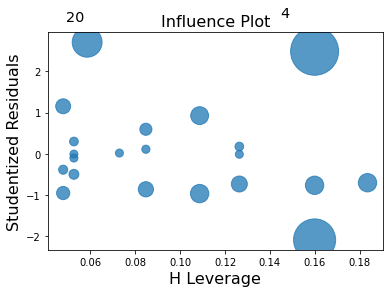

In [51]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [53]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [54]:
data[data.index.isin([7,18])]

,delivery_time,sorting_time
7,9.5,3
18,8.0,2


In [56]:
#See the differences in HP and other variable values
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [57]:
# Improving the model

In [59]:
#Load the data
data_new=pd.read_csv("delivery_time.csv")

In [60]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1=data_new.drop(data_new.index[[7,18]],axis=0).reset_index()

In [61]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [62]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,17.90,10
8,18.75,9
9,19.83,8


In [63]:
data1=data1.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)

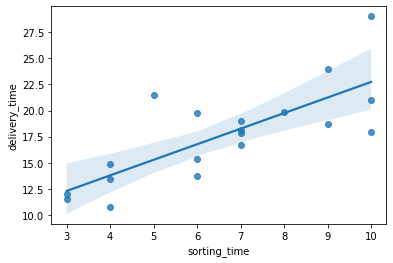

In [64]:
import statsmodels.formula.api as smf

sns.regplot(x=data1['sorting_time'],y=data1['delivery_time'],data=data1)
model2=smf.ols("delivery_time~sorting_time",data=data1).fit()
model2

In [65]:
newdata2=pd.Series([12,13,14,15])

In [66]:
data_pred2=pd.DataFrame(newdata2,columns=['sorting_time'])

In [67]:
data_pred2

,sorting_time
0,12
1,13
2,14
3,15


In [68]:
model2.predict(data1)

0     22.728074
1     13.799760
2     16.775864
3     21.240021
4     22.728074
5     16.775864
6     18.263917
7     22.728074
8     21.240021
9     19.751969
10    13.799760
11    18.263917
12    12.311708
13    12.311708
14    13.799760
15    16.775864
16    18.263917
17    18.263917
18    15.287812
dtype: float64